In [5]:
import sys
# TODO: clean this up
sys.path.insert(0, "/Users/danieldubovski/projects/deep_query_optimization/")
# sys.path

In [6]:
from dqo.datasets import QueriesDataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
ds = QueriesDataset("imdb:exec_time_clean")

In [8]:
db = ds.schema()

In [9]:
df = ds.load()

2020-10-12 23:09:38,633 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/exec_time_clean/runtimes/part_00.csv [1/1]
2020-10-12 23:09:39,372 | dqo.datasets | INFO | Loaded 27512 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/exec_time_clean/runtimes/part_00.csv [1/1]


In [10]:
df.runtime.describe()

count    27512.000000
mean         3.110239
std         14.658474
min          0.100008
25%          0.620929
50%          1.083305
75%          1.848192
max        328.635661
Name: runtime, dtype: float64

(array([17658.,  6130.,  1975.,   942.,     0.,   306.,   270.,    92.,
           41.,    98.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

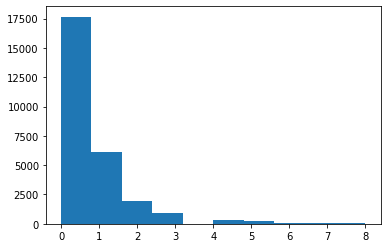

In [11]:
df['bucket'] = df.runtime.apply(np.log2).apply(np.round).apply(lambda x: max(0, x)).apply(lambda x: min(x,8))
plt.hist(df['bucket'])

## merge

In [12]:
ds_aug = QueriesDataset("imdb:exec_time_aug")
df_aug = ds_aug.load()

2020-10-12 23:09:42,360 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/exec_time_aug/runtimes/aug_01.csv [1/2]
2020-10-12 23:09:44,193 | dqo.datasets | INFO | Loaded 96530 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/exec_time_aug/runtimes/aug_01.csv [1/2]
2020-10-12 23:09:44,194 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/exec_time_aug/runtimes/aug_300_0_4798.csv [2/2]
2020-10-12 23:09:44,286 | dqo.datasets | INFO | Loaded 4798 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/exec_time_aug/runtimes/aug_300_0_4798.csv [2/2]


In [13]:
df_merge = df.append(df_aug)

In [14]:
df_merge = df_merge.query('runtime > 0.1')

In [15]:
df_merge.runtime.describe()

count    128840.000000
mean          6.442680
std          17.539285
min           0.100008
25%           1.294229
50%           1.831620
75%           3.852995
max         328.635661
Name: runtime, dtype: float64

In [16]:
df_merge = df_merge.drop_duplicates()

In [17]:
ds_aug.df = df_merge

In [26]:
ds_aug.df = ds_aug.groom()

100%|██████████| 124870/124870 [21:14<00:00, 97.99it/s]  


(array([20000., 20000., 20000., 10356.,     0.,  3300.,  3592.,  1294.,
          354.,   260.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

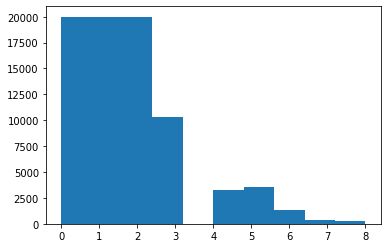

In [27]:
df_merge['bucket'] = df_merge.runtime.apply(np.log2).apply(np.round).apply(lambda x: max(0, x)).apply(lambda x: min(x,8)).astype(int)
plt.hist(df_merge['bucket'])

In [28]:
df_merge.groupby('bucket').count()

,query,runtime
bucket,,
0,20000,20000
1,20000,20000
2,20000,20000
3,10356,10356
4,3300,3300
5,3592,3592
6,1294,1294
7,354,354
8,260,260


In [31]:
ds_aug.df = ds_aug.df.query('nodes < 125')

In [32]:
import os
ds_aug.df.to_csv(os.path.join(ds_aug.input_path, 'aug_01.csv'), header=False, index=False, columns=['query', 'runtime'])

In [19]:
ds_aug.input_path

'/Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpch/execution/exec_time_aug/runtimes'

----

In [24]:
df = df.query('runtime > 0.1 ').query('runtime < 500')

(array([12500.,  6130.,  1975.,   942.,     0.,   306.,   270.,    92.,
           41.,    98.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

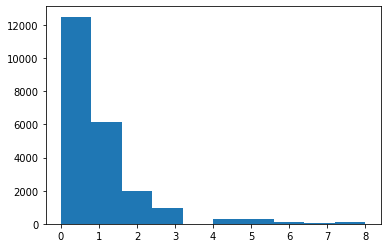

In [18]:
df['bucket'] = df.runtime.apply(np.log2).apply(np.round).apply(lambda x: max(0, x)).apply(lambda x: min(x,8)).astype(int)
plt.hist(df['bucket'])

In [25]:
df.groupby('bucket').count()

,query,runtime
bucket,,
0.0,17658,17658
1.0,6130,6130
2.0,1975,1975
3.0,942,942
4.0,306,306
5.0,270,270
6.0,92,92
7.0,41,41
8.0,98,98


In [20]:
ds.df = df

In [ ]:
df = ds.groom()

 13%|█▎        | 2811/22354 [00:24<03:29, 93.18it/s] 

In [18]:
len(ds.df), len(df)

(17297, 17297)

In [97]:
ds.input_path

'/Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/tpch/execution/exec_time_clean/runtimes'

In [80]:
ds.df = df

In [98]:
import os
ds.df.to_csv(os.path.join(ds.input_path, 'clean_00.csv'), header=False, index=False, columns=['query', 'runtime'])

In [15]:
df.groupby('nodes').count()

,query,runtime,bucket,parts
nodes,,,,
2.0,31,31,31,31
3.0,41,41,41,41
4.0,128,128,128,128
5.0,66,66,66,66
6.0,139,139,139,139
...,...,...,...,...
225.0,6,6,6,6
226.0,3,3,3,3
227.0,1,1,1,1


In [ ]:
plt.hist(ds.df['nodes'])

___
# augment
---

In [21]:
mean_bucket = int(ds.df[ds.df['bucket'] > 0].groupby('bucket').count().mean().runtime)

In [22]:
sample_size = mean_bucket
sample_size

1231

In [23]:
sample = df[df['bucket'] > 4]

In [24]:
len(sample)

501

(array([ 61., 121., 125.,  16.,  13.,  37.,  21.,   9.,   0.,  98.]),
 array([4.50572722, 4.8551545 , 5.20458178, 5.55400905, 5.90343633,
        6.25286361, 6.60229089, 6.95171817, 7.30114544, 7.65057272,
        8.        ]),
 <BarContainer object of 10 artists>)

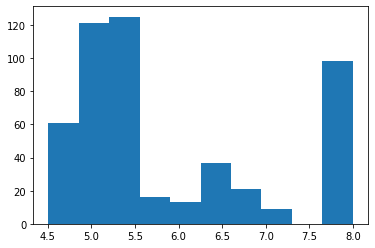

In [25]:
buckets = sample.runtime.apply(np.log2).apply(lambda x: min(x, 8)).apply(lambda x: max(0, x))
plt.hist(buckets)

In [27]:
import os

In [ ]:
batch_size = 300
_df = sample
for i in range(0,len(_df), batch_size):
    aug_df = ds.augment(_df[i:i+batch_size])
    f_name = os.path.join(ds.input_path, f'aug_{batch_size}_{i}:{i + len(aug_df)}')
    print(i, len(aug_df), f_name)
    aug_df.to_csv(f_name, header=False, index=False, columns=['query', 'runtime'])

100%|██████████| 300/300 [00:49<00:00,  6.10it/s]


0 4798 /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/exec_time_clean/runtimes/aug_300_0:4798


 17%|█▋        | 35/201 [00:56<00:30,  5.39it/s]

In [ ]:
len(aug_df)

In [1]:
ds.df.to_csv(os.path.join(ds.input_path, 'clean.csv'), header=False, index=False, columns=['query', 'runtime'])

NameError: name 'ds' is not defined

(array([1387.,  698.,  695., 1320.,  321.,  154.,  297., 1031.,  846.,
        3483.]),
 array([3.50493634, 3.95444271, 4.40394907, 4.85345544, 5.3029618 ,
        5.75246817, 6.20197454, 6.6514809 , 7.10098727, 7.55049363,
        8.        ]),
 <BarContainer object of 10 artists>)

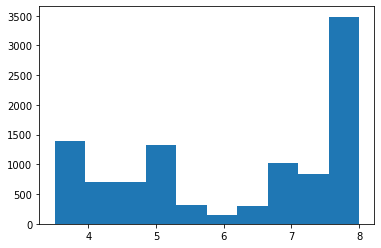

In [19]:
buckets = aug_df.runtime.apply(np.log2).apply(lambda x: min(x, 8)).apply(lambda x: max(0, x))
plt.hist(buckets)


In [16]:
ds.save()

In [25]:
df['partition'] = df.runtime.apply(np.log2).apply(lambda x: min(x, 8)).apply(lambda x: max(0, x))
slow_df = df[df['partition'] > 4]
len(slow_df)

5061

In [17]:
import os
os.getcwd()

'/Users/danieldubovski/projects/deep_query_optimization/dqo/datasets'

In [40]:
with open('/Users/danieldubovski/projects/deep_query_optimization/dqo/localhost_imdb.qcp', 'w+') as dcp_file:
    for idx, row in slow_df.iterrows():
        dcp_file.write(f"{row['query']}\n")
    

In [98]:
from dqo.relational import SQLParser
from tqdm import tqdm

In [ ]:
queries = []

for idx, row in tqdm(ds.df.iterrows(), total=ds.df.shape[0]):
    queries.append(SQLParser.to_query(row['query']))

In [120]:
db

Database(tables=[Table(aka_name, [Column(id, number), Column(person_id, number), Column(name, string), Column(imdb_index, string), Column(name_pcode_cf, string), Column(name_pcode_nf, string), Column(surname_pcode, string), Column(md5sum, string)]), Table(aka_title, [Column(id, number), Column(movie_id, number), Column(title, string), Column(imdb_index, string), Column(kind_id, number), Column(production_year, number), Column(phonetic_code, string), Column(episode_of_id, number), Column(season_nr, number), Column(episode_nr, number), Column(note, string), Column(md5sum, string)]), Table(cast_info, [Column(id, number), Column(person_id, number), Column(movie_id, number), Column(person_role_id, number), Column(note, string), Column(nr_order, number), Column(role_id, number)]), Table(char_name, [Column(id, number), Column(name, string), Column(imdb_index, string), Column(imdb_id, number), Column(name_pcode_nf, string), Column(surname_pcode, string), Column(md5sum, string)]), Table(comp_ca

In [111]:
from collections import defaultdict, Counter
tables = defaultdict(int)
for query in queries:
    c = Counter([r.name for r in query._relations])
    for k, v in c.items():
        tables[k] += v
    
tables_df = pd.DataFrame(tables.items(), columns=['table', 'count'])
tables_df
    

,table,count
0,cast_info,29
1,title,55
2,kind_type,34
3,role_type,16
4,company_name,41
5,complete_cast,26
6,char_name,29
7,aka_name,18
8,person_info,17
9,comp_cast_type,28
